# Machine Learning

---

### Names: [name here]

**Before you do anything else, go to *File -> Save As* and change the filename to include your name or initials. Make any requested edits to that copy.**

This lab explores machine learning tasks as applied to astronomical data sets.

#### New Code:

This lab will introduce a number of different pieces of code, including code that can:


*   

---

In [9]:
# Import useful packages
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd


*Machine Learning* refers to a class of algorithms that are designed to make informed, data-driven decisions. It is a very broad class, and includes many distinct methods, with seemingly little in common. At times it can seem like magic, especially when extended to artificial intelligence, but at other times can seem rather mundane (a machine learning algorithm to fit a line to some data??).

Generally speaking, machine learning tools are used to do one of the following four things:
* Recognize an instance of a certain type. For example, you have an image and would like to identify whether the object in the center is a galaxy, a star, a nebula, etc.
* Predict some property or information on the basis of other information. For example, given a sequence of images of an object whose flux varies with time in some complicated way, predict the flux of the object next week/month/year so that you can plan observations of it.
* Group together objects that are similar. For example, you are working with data from a new survey of the sky, and want to group together all of the galaxies in the images, all of the stars, and all of the nebula, and all of the interesting objects that don't fit into these categories. This is referred to as *clustering.*
* Simplify the information contained in a complicated data. For example, you have measurements of the brightness of hundreds of millions of galaxies at hundreds of different wavelengths, and want to simplify the observations of each galaxy to a couple of key factors, so that you can see how these factors vary between different types of galaxies. This is known as *dimensionality reduction*.  

There are many, many, many different machine learning algorithms. Many more than we could possibly cover in one lab. We will talk a little bit about broad categories, but for the most part this lab will focus on how to evaluate whether or not an algorithm is working properly. 

In particular we will look at:
* Choosing a training set and a test set (for supervised learning)
* Normalizing data
* Confusion martix
* ROC curve
* Accuracy score
* Cross validation

Let's start by loading in a dataset to play around with. This is data from the Habitable Worlds Catalog, a catalog of potentially habitable planets around other stars. This table contains various information about mass, radius, and temperature of the planet, as well as a rating for how 'Earth-like' it is.

For these activities we will use the data to see if a machine learning-algorithm can predict how Earth-like a planet is based on its other properties.

First let's load in the data and take a look at it.

In [100]:
LearningSet_all = pd.read_csv('hwc_table_all.csv')
LearningSet_all

,Name,Type,Detection Method,Mass<br>(M<sub>E</sub>),Radius<br>(R<sub>E</sub>),Flux<br>(S<sub>E</sub>),<i>T<sub>surf</sub></i><br>(K),Period<br>(days),Distance<br>(ly),Age<br>(Gy),ESI
0,TOI-904 c,M Warm Superterran,Transit,5.340,2.167,0.524434,244.820750,83.999700,150.322365,1.5,0.658603
1,TOI-700 e,M Warm Terran,Transit,0.818,0.953,1.278049,305.688111,27.809780,101.520947,1.5,0.912032
2,TOI-700 d,M Warm Terran,Transit,1.250,1.073,0.859827,276.939259,37.423960,101.520947,1.5,0.941176
3,GJ 357 d,M Warm Superterran,Radial Velocity,6.100,2.340,0.382595,226.261383,55.661000,30.795030,NaN,0.575518
4,GJ 3293 d,M Warm Superterran,Radial Velocity,7.600,2.670,0.588593,251.304031,48.134500,65.851875,NaN,0.629777
...,...,...,...,...,...,...,...,...,...,...,...
65,K2-72 e,M Warm Terran,Transit,2.210,1.290,1.303262,306.685393,24.158868,216.672280,NaN,0.870824
66,Kepler-443 b,K Warm Superterran,Transit,6.040,2.330,0.890088,278.800421,177.669300,2616.655003,3.2,0.714604
67,K2-332 b,M Warm Superterran,Transit,5.480,2.200,1.166542,298.985869,17.706320,401.830715,NaN,0.729321
68,Ross 508 b,M Warm Superterran,Radial Velocity,4.000,1.830,1.320491,301.859146,10.770000,36.563066,NaN,0.770771


The final column, ESI, which ranges from 0 to 1, is related to how Earth-like the planet is. 

You also notice that some entries have `NaN` in place of a number. We want to get rid of those, since our ML algorithms can't handle NaNs.

In [101]:
LearningSet_all = LearningSet_all.dropna(axis=0)
LearningSet_all

,Name,Type,Detection Method,Mass<br>(M<sub>E</sub>),Radius<br>(R<sub>E</sub>),Flux<br>(S<sub>E</sub>),<i>T<sub>surf</sub></i><br>(K),Period<br>(days),Distance<br>(ly),Age<br>(Gy),ESI
0,TOI-904 c,M Warm Superterran,Transit,5.34000,2.167,0.524434,244.820750,83.999700,150.322365,1.50,0.658603
1,TOI-700 e,M Warm Terran,Transit,0.81800,0.953,1.278049,305.688111,27.809780,101.520947,1.50,0.912032
2,TOI-700 d,M Warm Terran,Transit,1.25000,1.073,0.859827,276.939259,37.423960,101.520947,1.50,0.941176
7,LP 890-9 c,M Warm Terran,Transit,25.30000,1.367,0.908576,280.876792,8.457463,105.771738,7.20,0.885251
8,LHS 1140 b,M Warm Superterran,Transit,5.60000,1.730,0.425226,232.236106,24.737230,48.878064,5.00,0.657843
9,Teegarden's Star b,M Warm Terran,Radial Velocity,1.16000,1.050,1.077943,293.090137,4.906340,12.494319,8.00,0.968362
10,Teegarden's Star c,M Warm Terran,Radial Velocity,1.05000,1.020,0.349402,221.119159,11.416000,12.494319,8.00,0.659005
11,Kepler-705 b,M Warm Superterran,Transit,5.10000,2.110,0.765639,269.111049,56.056054,903.063994,3.89,0.730737
12,Kepler-452 b,G Warm Superterran,Transit,3.29000,1.630,1.109013,295.229451,384.843000,1799.490714,6.00,0.826718
14,K2-9 b,M Warm Superterran,Transit,5.69000,2.250,1.448496,315.612957,18.449800,270.589128,1.00,0.698768


First, we will look at a *Supervised Learning* algorithm. This is an algorithm in which we have a *learning set* for which the target property (i.e., whether a planet is Earth-like) is known. An ML algorithm will use the learning set to infer a set of rules connecting the observed properties (e.g., mass, radius, temperature) to the target property.

After training our algorithm on the data, we want some way to test how effectively it works. To do this we divide up our learning set into a *training set* and a *test set*. The ML algorithm will be trained on the training set, and then will be applied to the test set to see how well it does. Both the training and test set are subsets of the original learning set, and so each has the labels we need to train/verify the algorithm. Only after this set can the data be applied to data for which the labels do not exist.

In the code block below, when we define the training and test set, we drop four of the columns from the data set. First, we drop the ESI column, because it would be cheating to use the ESI value to predict the ESI value. Second, we drop columns whose values are strings, and which should have no bearing on whether or not a planet is habitable (e.g., if the name is a good predictor of whether or not a planet is habitable, then something weird is going on with our data).

**Q:** The machine learning algorithm doesn't know anything about physics/astronomy, but you might! Are there other columns that you might want to drop, that shouldn't be a predictor of whether or not a planet is habitable?

In [115]:
TrainSet_all = LearningSet_all.iloc[:30,:]
TestSet_all = LearningSet_all.iloc[30:,:]

Xtrain_all = TrainSet_all.drop(['Name','ESI','Type','Detection Method'],axis=1)
Xtest_all = TestSet_all.drop(['Name','ESI','Type','Detection Method'],axis=1)
ytrain_all = TrainSet_all.ESI>0.85
ytest_all = TestSet_all.ESI>0.85
X_all = LearningSet_all.drop(['Name','ESI','Type','Detection Method'],axis=1)
y_all = LearningSet_all.ESI>0.85

The first thing we need to do is make sure our test set and training set cover the same range of parameter space. If they do not (e.g., our training set only includes planets >5 R_earth, while our test set only include planets with radii <2 R_earth) then our model will be biased and may not produce accurate results. Our ML algorithm will still run when applied to our test set, we just should not believe the results...

**Q:** In any way you want, examine the data across all of the parameters to see if the training set and test set cover the same range of parameter space.


In [ ]:
### Insert code here

For now we will stick with a binary classification; planets with ESI>0.8 will be considered habitable, while all other planets will be considered not habitable. Later we will consider ML algorithms that can predict continous variables (e.g., the actual ESI value).

The code block below trains a particular ML algorithm (a Decision Tree) on the data set, and then uses that algorithm to predict the classification of the objects in the test set. Machine learning algorthms in the `sklearn` package follow this same general syntax of:

```python
model = [Some ML algorithm]
model.fit(Xtrain,ytrain)
ypred = model.predict(Xtest)
```

Where the first line defines the type of ML algorithm we are using, the second line trains the ML algorithm on our training set, and the third line predicts a set of values (in this case, whether or not a planet is habitable) for our test set. 

In [116]:
model = DecisionTreeClassifier()
model.fit(Xtrain_all,ytrain_all)

ypred = model.predict(Xtest_all)

The simplest metric for an ML algorithm is to look at how accurately it predicts the classifications within the test set. Given our sample size we can look at the individual classifications. We can also calculate an *accuracy score* which is the fraction of classifications that the algorithm gets correct.

For comparison we are going to introduce a dummy classification scheme, in which we assume all of the planets are not habitable. This is an overly simplistic model, but it is a useful comparison point because we have chosen a relatively stringent boundary for a planet being habitable, one in which nearly all of the planets are not habitable. This provides useful context for our accuract score. We hope that the ML algorithm can do better than the dummy method!

In [117]:
ypred_dummy = np.zeros(len(ytest_all),dtype=bool)
print('Accuracy Score: ',accuracy_score(ytest_all,ypred_dummy))

Accuracy Score:  0.7894736842105263


In [118]:
print('Test set classification (1=Habitable, 0=Not Habitable): ',ytest_all)
print('Predicted classifications: ',ypred)

print('Accuracy Score: ',accuracy_score(ytest_all,ypred))

Test set classification (1=Habitable, 0=Not Habitable):  43    False
44    False
45    False
46    False
47     True
49    False
51    False
52    False
53     True
54    False
55    False
56    False
57    False
58    False
59    False
62    False
63     True
64     True
66    False
Name: ESI, dtype: bool
Predicted classifications:  [False False False False  True False False False  True False False False
 False False False False False False False]
Accuracy Score:  0.8947368421052632


Not bad!

**Q:** What is the accuracy score for the dummy algorithm? How does it compare to the ML algorithm?

Another way to look at this is with a *confusion matrix*. This is a matrix showing how the classifications break down, in terms of the number of objects that (1) are habitable, and are predicted to be habitable, (2) are not habitable, and are predicted to be not habitable, (3) are habitable, but are predicted to be not habitable, (4) are not habitable, but are predicted to be habitable.

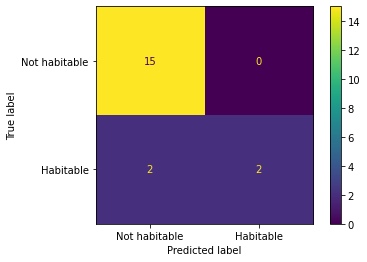

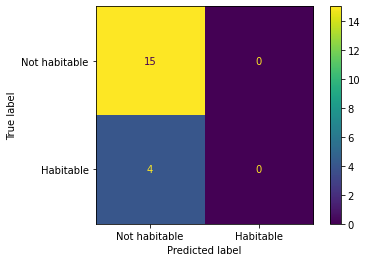

In [119]:
cm = confusion_matrix(ytest_all,ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not habitable','Habitable'])
disp.plot()

cm = confusion_matrix(ytest_all,ypred_dummy)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not habitable','Habitable'])
disp.plot()

Again, not bad! It looks like there is one planet that is habtitable, that the model predicts is not habitable. This is to say that there is one False Negative. 

"False Negative" introduces terminology that is useful for a binary classifier. We have assigned "Not Habitable" as "Negative". From this we can define four numbers: the amount of True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN). In this convention, the second word is the classification assigned by the model, and the first word indicates whether or not the classification is true. 

In this language, our accuracy score is the total number of corret classifications over the total number: (TN+TP)/(TN+TP+FN+FP).


**Q:** Create a confusion matrix for the dummy algorithm. 


*Precision:* (=purity) The fraction of correct positive classifications (=TP/(TP+FP)). Out of all the examples that have been classified as belonging to the positive class, how many of these actually belong to the positive class? 

*Recall:* (=completeness) The fraction of correctly identified positive examples (=TP/(TP+FN)). Out of the totality of objects that truly belong to the positive class, how many of them has our model captured?

Maximizing either the precision or recall depends on the science question you are interested in. 


Receiver Operating Characteristic curve, or ROC curve: Lets go back and consider our classification scheme as not just predicting whether or not a planet is habitable, but as predicting a probability that it is habitable. Our final classification is applied to sources that score above a certain threshold (=0.5 in a standard binary classification). We can then examine the rate of false positives (FPR = FP/(FP+TN)) versus the rate of true positives (TPR=TP/(TP+FN)) for different values of the threshold, from 1 (no object is positive, FP=0, TP=0) to 0 (all objects are positive, TN=0). These boundaries mean that all ROC curves pass through (0,0) and (1,1). A perfect classifier is one that approaches the point in the upper left, with close-to-zero FP rate and close-to-one TP rate. Non-predictive models will stay close to the diagonal line.


(0.0, 1.05)

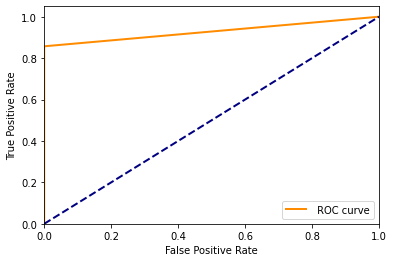

In [ ]:
probs = model.predict_proba(Xtest_all)[:,1]
fpr,tpr,thresholds = roc_curve(ytest_all,probs)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=2,label=' ROC curve')
plt.plot([0,1],[0,1],color='navy',lw=2,ls='--') #Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])

## Supervised Learning

We have a *learning set* for which the target property is known. A ML algorithm will use the learning set to infer the rules connecting the observed properties to the target property. 

It is customary to set aside some of the learning set to test the ML model, after it has been trained on the rest of the data set. 

* A supervised learning method is only as good as its learning set. 
* Check that the feature space spanned by the learning set is the same as that of the population that we want to apply the model to. 

#### Classification vs Regression tasks:
In classification the result is a discrete property (e.g., this object is a galaxy/star/nebula/other), which for *regression* the result can be a continuous property (e.g., based on the BVRI photometry for a collection of stars, predict the I magnitude for stars for which we only have BVR magnitudes). 

## Unsupervised Learning

We are trying to discover patterns in the data, without the help of labeled examples.

### Clustering
Grouping together objects with similar properties.

### Dimensionality Reduction
Focuses on "simplifying" a data set. This can involve retaining the original information from a data, but only retaining the pieces that are most meaningful. Or the original data can be remapped into a different feature space, in which fewer components are needed to explain the data set. 

|Machine Learning|Model Fitting|
|---------|-------------------|
|Data-driven (only as good as the data) | Intution or model-driven (only as good as the scientist) |
|Usually generalizes poorly (model derived using some data can't be applied blindly to different data) | Generalizes well if the phyiscs is well understood |
|Interpretation is possible but might be nontrivial | Easier to interpret|
|Fast(er) | Might be computationally intensive|
|More robust/accomodating of mixed and missing data | Dealing with heterogeneous data often a pain in the neck|
|Allows serendipitous discoveries| Leads to loss of information if models are too simplistic|

This lab will introduce you to some algorithms in machine learning, but it will just barely scratch the surface. Many online resources exist that describe the plethora of algorithms, many of which are collected in the `sklearn` python package, and as a result follow a very similar syntax.

Instead we will focus on how to figure out if your machine learning algorithm has done something useful and accurate. It may be easy to run an ML algorithm, but our interest is in the scientific result, and hence we need to be careful that the ML algorithm hasn't led us astray, does not have some huge bias, etc. 

In [ ]:
#First we need to load in some data. We will split the data into training and testing sets, and assume that no other processing is needed. 

LearningSet = pd.read_csv('HPLearningSet.csv')
TrainSet = LearningSet.iloc[:13,:]
TestSet = LearningSet.iloc[13:,:]

In [14]:
Xtrain = TrainSet.drop(['Name','Habitable'],axis=1)
Xtest = TestSet.drop(['Name','Habitable'],axis=1)
ytrain = TrainSet.Habitable
ytest = TestSet.Habitable

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay, roc_curve
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.model_selection import cross_val_score

In [15]:
### Next we will create our model, train the model on the training set, and then predict the outcomes of the test set. 

model = DecisionTreeClassifier(random_state=3)
model.fit(Xtrain,ytrain)

DecisionTreeClassifier(random_state=3)

In [18]:
ypred = model.predict(Xtest)
print(accuracy_score(ytest,ypred))

0.6


In [22]:
model = KNeighborsClassifier(1)
model.fit(Xtrain,ytrain)

ypred = model.predict(Xtest)
print(accuracy_score(ytest,ypred))

0.8


In [ ]:
### Try different train and test sets?
### Standardize the data (in the context of kNN)?
### Look at data to make sure training and test set cover the same parameter space
### Confusion matrix, ROC curve, cross validation
### Regression

In [98]:
LearningSet_all = pd.read_csv('hwc_table_all.csv')
LearningSet_all = LearningSet_all.dropna(axis=0)
print(LearningSet_all.shape)
TrainSet_all = LearningSet_all.iloc[:30,:]
TestSet_all = LearningSet_all.iloc[30:,:]

Xtrain_all = TrainSet_all.drop(['Name','ESI','Type','Detection Method'],axis=1)
Xtest_all = TestSet_all.drop(['Name','ESI','Type','Detection Method'],axis=1)
ytrain_all = TrainSet_all.ESI>0.8
ytest_all = TestSet_all.ESI>0.8
X_all = LearningSet_all.drop(['Name','ESI','Type','Detection Method'],axis=1)
y_all = LearningSet_all.ESI>0.8

(49, 11)
0     0.658603
1     0.912032
2     0.941176
7     0.885251
8     0.657843
9     0.968362
10    0.659005
11    0.730737
12    0.826718
14    0.698768
16    0.792664
17    0.799974
18    0.685240
19    0.700254
20    0.738574
21    0.633633
22    0.658500
23    0.575664
24    0.790637
26    0.907662
31    0.599466
32    0.763730
33    0.845495
35    0.827428
36    0.520101
37    0.678714
38    0.806760
39    0.798101
40    0.646488
41    0.721633
Name: ESI, dtype: float64 0     False
1      True
2      True
7      True
8     False
9      True
10    False
11    False
12     True
14    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
26     True
31    False
32    False
33     True
35     True
36    False
37    False
38     True
39    False
40    False
41    False
Name: ESI, dtype: bool


In [85]:
Xtrain_all.columns

Index(['Mass<br>(M<sub>E</sub>)', 'Radius<br>(R<sub>E</sub>)',
       'Flux<br>(S<sub>E</sub>)', '<i>T<sub>surf</sub></i><br>(K)',
       'Period<br>(days)', 'Distance<br>(ly)', 'Age<br>(Gy)'],
      dtype='object')

Text(0, 0.5, 'Radius (R_earth)')

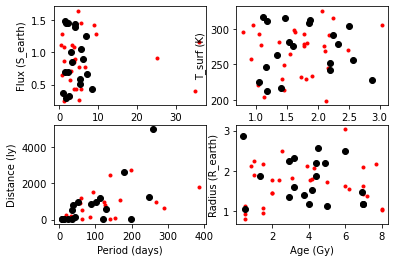

In [70]:
###Q: One test we need to run is to make sure the training and test sets are similar. Examine the training and test sets, in whatever way you prefer, to make sure they are similar. 


plt.subplot(2,2,1)
plt.plot(Xtrain_all['Mass<br>(M<sub>E</sub>)'],Xtrain_all['Flux<br>(S<sub>E</sub>)'],'.r')
plt.plot(Xtest_all['Mass<br>(M<sub>E</sub>)'],Xtest_all['Flux<br>(S<sub>E</sub>)'],'ok')
plt.xlabel('Mass (M_earth)')
plt.ylabel('Flux (S_earth)')

plt.subplot(2,2,2)
plt.plot(Xtrain_all['Radius<br>(R<sub>E</sub>)'],Xtrain_all['<i>T<sub>surf</sub></i><br>(K)'],'.r')
plt.plot(Xtest_all['Radius<br>(R<sub>E</sub>)'],Xtest_all['<i>T<sub>surf</sub></i><br>(K)'],'ok')
plt.xlabel('Radius (R_earth)')
plt.ylabel('T_surf (K)')

plt.subplot(2,2,3)
plt.plot(Xtrain_all['Period<br>(days)'],Xtrain_all['Distance<br>(ly)'],'.r')
plt.plot(Xtest_all['Period<br>(days)'],Xtest_all['Distance<br>(ly)'],'ok')
plt.xlabel('Period (days)')
plt.ylabel('Distance (ly)')

plt.subplot(2,2,4)
plt.plot(Xtrain_all['Age<br>(Gy)'],Xtrain_all['Radius<br>(R<sub>E</sub>)'],'.r')
plt.plot(Xtest_all['Age<br>(Gy)'],Xtest_all['Radius<br>(R<sub>E</sub>)'],'ok')
plt.xlabel('Age (Gy)')
plt.ylabel('Radius (R_earth)')

In [75]:
model = KNeighborsClassifier(5)
model.fit(Xtrain_all,ytrain_all)

ypred_all = model.predict(Xtest_all)
print(accuracy_score(ytest_all,ypred_all))

0.7368421052631579


In [72]:
model = DecisionTreeClassifier(random_state=3)
model.fit(Xtrain_all,ytrain_all)
ypred_all = model.predict(Xtest_all)
print(accuracy_score(ytest_all,ypred_all))

0.9473684210526315


(30, 7)
0.8421052631578947
Cross validation accuracy: 0.77 (+/- 0.12)
0.9473684210526315
Cross validation accuracy: 0.96 (+/- 0.05)


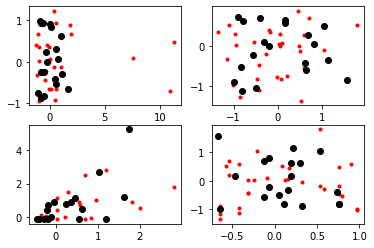

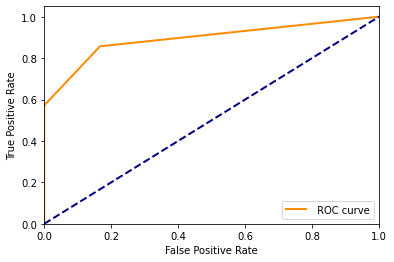

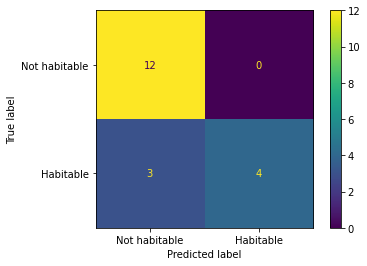

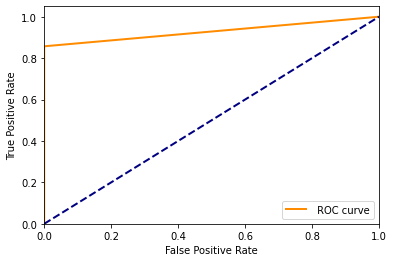

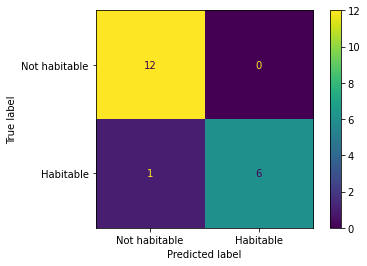

In [99]:
### Scaling the data
scaler = RobustScaler()
scaler.fit(Xtrain_all)
Xtrain_all_scaled = scaler.transform(Xtrain_all)
Xtest_all_scaled = scaler.transform(Xtest_all)

print(Xtrain_all_scaled.shape)

plt.subplot(2,2,1)
plt.plot(Xtrain_all_scaled[:,0],Xtrain_all_scaled[:,2],'.r')
plt.plot(Xtest_all_scaled[:,0],Xtest_all_scaled[:,2],'ok')
#plt.xlabel('Mass (M_earth)')
#plt.ylabel('Flux (S_earth)')

plt.subplot(2,2,2)
plt.plot(Xtrain_all_scaled[:,1],Xtrain_all_scaled[:,3],'.r')
plt.plot(Xtest_all_scaled[:,1],Xtest_all_scaled[:,3],'ok')
#plt.xlabel('Radius (R_earth)')
#plt.ylabel('T_surf (K)')

plt.subplot(2,2,3)
plt.plot(Xtrain_all_scaled[:,4],Xtrain_all_scaled[:,5],'.r')
plt.plot(Xtest_all_scaled[:,4],Xtest_all_scaled[:,5],'ok')
#plt.xlabel('Period (days)')
#plt.ylabel('Distance (ly)')

plt.subplot(2,2,4)
plt.plot(Xtrain_all_scaled[:,6],Xtrain_all_scaled[:,1],'.r')
plt.plot(Xtest_all_scaled[:,6],Xtest_all_scaled[:,1],'ok')
#plt.xlabel('Age (Gy)')
#plt.ylabel('Radius (R_earth)')

model = KNeighborsClassifier(5)
model.fit(Xtrain_all_scaled,ytrain_all)
ypred_all = model.predict(Xtest_all_scaled)
probs = model.predict_proba(Xtest_all_scaled)[:,1]
fpr,tpr,thresholds = roc_curve(ytest_all,probs)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=2,label=' ROC curve')
plt.plot([0,1],[0,1],color='navy',lw=2,ls='--') #Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
print(accuracy_score(ytest_all,ypred_all))
cm = confusion_matrix(ytest_all,ypred_all)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not habitable','Habitable'])
disp.plot()
scores = cross_val_score(model,X_all,y_all,cv=5)
print("Cross validation accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

model = DecisionTreeClassifier(random_state=3)
model.fit(Xtrain_all_scaled,ytrain_all)
ypred_all = model.predict(Xtest_all_scaled)
probs = model.predict_proba(Xtest_all_scaled)[:,1]
fpr,tpr,thresholds = roc_curve(ytest_all,probs)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=2,label=' ROC curve')
plt.plot([0,1],[0,1],color='navy',lw=2,ls='--') #Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
print(accuracy_score(ytest_all,ypred_all))
cm = confusion_matrix(ytest_all,ypred_all)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not habitable','Habitable'])
disp.plot()
scores = cross_val_score(model,X_all,y_all,cv=5)
print("Cross validation accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

### Scaling the data doesn't seem to make much of a difference...
### Choosing a different training or testing set doesn't seem to make much of a difference...

- Pull one data set for Anne, one for Tom, and one for me. Students then choose which to pursue, using a method that they look up online. It will be open ended, but maybe I can ask a narrow science question. That would keep the focus on evaluating whether the ML algorithm did something good/useful, and would give them space to explore. 

Lets try using a dataset from an SQL query. That would connect with what they have seen earlier.

In [1]:
!pip install git+http://github.com/astropy/astroquery.git#egg=astroquery
# First, suppress some warnings and import useful packages
import warnings
warnings.filterwarnings('ignore',module='astropy.io.votables.tree')
warnings.filterwarnings('ignore',message='.*unclosed..socket')

import astropy.units as u
from astropy.coordinates import SkyCoord, ICRS
from astroquery.sdss import SDSS #package that allows queries of the SDSS database


  Cloning http://github.com/astropy/astroquery.git to /private/var/folders/n3/_s65fc7n5jd4gll4g_xrvwzc0000gq/T/pip-install-dcgxgbnx/astroquery_faa5ad497be141b787807261e1a006bc
  Running command git clone -q http://github.com/astropy/astroquery.git /private/var/folders/n3/_s65fc7n5jd4gll4g_xrvwzc0000gq/T/pip-install-dcgxgbnx/astroquery_faa5ad497be141b787807261e1a006bc
  Resolved http://github.com/astropy/astroquery.git to commit 01939a4328436e51dbfad5ca6085a15f351f82c1
  Running command git submodule update --init --recursive -q
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.1 MB 5.9 MB/s eta 0:00:01
  Created wheel for astroquery: filename=astroquery-0.4.11.dev10259-py3-none-any.whl size=11136872 sha256=ec100e316c85c8c9b052473ed89997de00fac017716b06845ddc8071b8c0bade
  Stored in directory: /private/var/folders/n3/_s65fc7n5jd4gll4g_xrvwzc0000gq/T/pip-ephem-wheel-cache

In [183]:
query_string ='''select 
  p.modelmag_g, p.modelmag_i, p.modelmag_u, p.modelmag_z, p.modelmag_r, 
  p.ra, p.dec, 
  p.petroRAD_r,
  s.z
from photoobjall p
join specobj s on s.bestobjid = p.objid
where
  p.ra between 175 and 185 and
  p.dec between 7 and 17 and
  s.class = 'galaxy' and
  s.z between 0.001 and .5

'''
### The cluster is between .002<z<.006
data = SDSS.query_sql(query_string,verbose=False)
print(data)

modelmag_g modelmag_i modelmag_u ...       dec        petroRAD_r     z     
---------- ---------- ---------- ... ---------------- ---------- ----------
  18.95465   16.60794   20.32892 ... 7.00109932965974   12.60262 0.02040104
  16.52203    15.4267   18.18935 ...  7.3502097205878   5.903148 0.02003922
  17.86446   16.64329   19.77328 ...  7.6349653624702   4.811748 0.08442274
   17.7181   17.22453   18.67706 ... 7.74324114226423   5.451916 0.01965394
   17.9164    17.3392   18.98044 ... 7.70691520523881   5.475275  0.0209739
  17.94467   16.72088   19.64197 ... 7.81511363223403   3.393647 0.08500408
  18.10022   16.77342   19.85084 ... 7.80929279019134   6.694256  0.1918329
  18.35121   16.97165    19.7178 ... 7.75723928581775   5.981788  0.1927777
  16.36559   15.70846   17.47503 ...  7.7742827060371   14.70004 0.01982321
   21.6824   21.24686   23.92007 ... 7.77411887116768    1.35944 0.01987087
       ...        ...        ... ...              ...        ...        ...
  18.03648  

In [211]:
df = data.to_pandas()
df.iloc[:30,:]

data2={'u-g':df['modelmag_u']-df['modelmag_g'],'r-i':df['modelmag_r']-df['modelmag_i'],'i-z':df['modelmag_i']-df['modelmag_z'],'z':df['z']}
df2 = pd.DataFrame(data2)  
df2.iloc[:30,:]

,u-g,r-i,i-z,z
0,1.37427,0.24130,-1.77327,0.020401
1,1.66732,0.35368,0.28263,0.020039
2,1.90882,0.46173,0.28645,0.084423
3,0.95896,0.17692,-0.03989,0.019654
4,1.06404,0.19153,0.18625,0.020974
5,1.69730,0.38540,0.32066,0.085004
6,1.75062,0.38051,0.29047,0.191833
7,1.36659,0.46933,0.28327,0.192778
8,1.10944,0.24830,0.06182,0.019823
9,2.23767,0.08040,-0.10885,0.019871


In [185]:
TrainSet_all = df.iloc[:15000,:]
TestSet_all = df.iloc[15000:,:]

Xtrain_all = TrainSet_all.drop(['z','ra','dec'],axis=1)
Xtest_all = TestSet_all.drop(['z','ra','dec'],axis=1)
ytrain_all = (TrainSet_all.z<0.25) & (TrainSet_all.z>.002)
ytest_all = (TestSet_all.z<0.25) & (TestSet_all.z>.002)
X_all = df.drop(['z','ra','dec'],axis=1)
y_all = (df.z<0.25) & (df.z>.002)

In [212]:
TrainSet_all = df2.iloc[:15000,:]
TestSet_all = df2.iloc[15000:,:]

Xtrain_all = TrainSet_all.drop(['z'],axis=1)
Xtest_all = TestSet_all.drop(['z'],axis=1)
ytrain_all = (TrainSet_all.z<0.25) & (TrainSet_all.z>.002)
ytest_all = (TestSet_all.z<0.25) & (TestSet_all.z>.002)
X_all = df2.drop(['z'],axis=1)
y_all = (df2.z<0.25) & (df2.z>.002)

KeyError: 'modelmag_g'

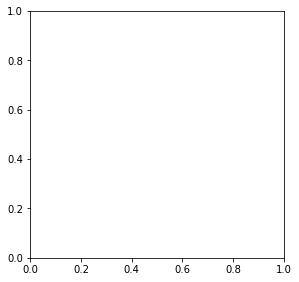

In [203]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(Xtrain_all['modelmag_g'],Xtrain_all['modelmag_i'],'.k')
plt.plot(Xtest_all['modelmag_g'],Xtest_all['modelmag_i'],'or')
plt.xlabel('modelmag_g')
plt.ylabel('modelmag_i')

plt.subplot(2,2,2)
plt.plot(Xtrain_all['modelmag_u'],Xtrain_all['modelmag_r'],'.k')
plt.plot(Xtest_all['modelmag_u'],Xtest_all['modelmag_r'],'or')
plt.xlabel('modelmag_u')
plt.ylabel('modelmag_r')

plt.subplot(2,2,3)
plt.plot(Xtrain_all['modelmag_z'],Xtrain_all['petroRAD_r'],'.k')
plt.plot(Xtest_all['modelmag_z'],Xtest_all['petroRAD_r'],'or')
plt.xlabel('modelmag_z')
plt.ylabel('petroRAD_r')

plt.subplot(2,2,4)
plt.hist(df['z'],bins=10)
plt.xlabel('z')

Text(0.5, 0, 'z')

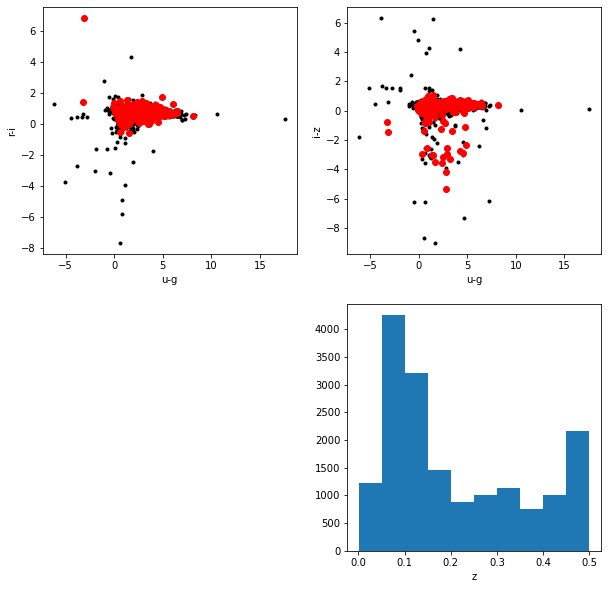

In [214]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(Xtrain_all['u-g'],Xtrain_all['r-i'],'.k')
plt.plot(Xtest_all['u-g'],Xtest_all['r-i'],'or')
plt.xlabel('u-g')
plt.ylabel('r-i')

plt.subplot(2,2,2)
plt.plot(Xtrain_all['u-g'],Xtrain_all['i-z'],'.k')
plt.plot(Xtest_all['u-g'],Xtest_all['i-z'],'or')
plt.xlabel('u-g')
plt.ylabel('i-z')

plt.subplot(2,2,4)
plt.hist(df2['z'],bins=10)
plt.xlabel('z')

In [215]:
model = DecisionTreeClassifier()
model.fit(Xtrain_all,ytrain_all)

ypred = model.predict(Xtest_all)

In [216]:
print('Test set classification (1=In the cluster, 0=Outside of the cluster): ',ytest_all)
print('Predicted classifications: ',ypred)

print('Accuracy Score: ',accuracy_score(ytest_all,ypred))

Test set classification (1=In the cluster, 0=Outside of the cluster):  15000     True
15001    False
15002     True
15003    False
15004    False
         ...  
17057     True
17058     True
17059    False
17060     True
17061     True
Name: z, Length: 2062, dtype: bool
Predicted classifications:  [False False  True ... False  True  True]
Accuracy Score:  0.899612027158099


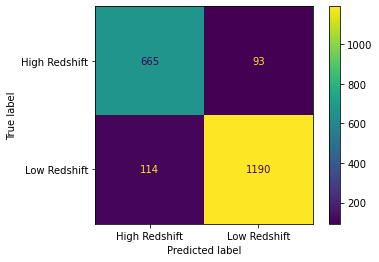

In [217]:
cm = confusion_matrix(ytest_all,ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['High Redshift','Low Redshift'])
disp.plot()

(0.0, 1.05)

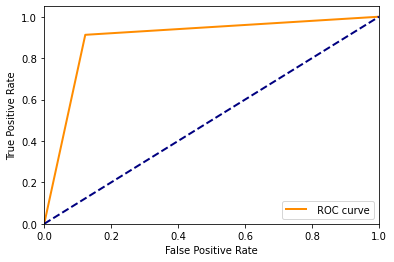

In [218]:
probs = model.predict_proba(Xtest_all)[:,1]
fpr,tpr,thresholds = roc_curve(ytest_all,probs)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=2,label=' ROC curve')
plt.plot([0,1],[0,1],color='navy',lw=2,ls='--') #Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])

Next, try linear regression between ugriz photometry and redshift.

(Talk about loss functions and R^2 metric, while pointing out the difficulty in interpreting what these numbers mean.)

In [219]:
from sklearn import linear_model

ytrain_all = TrainSet_all.z
ytest_all = TestSet_all.z
y_all = df2.z

model = linear_model.LinearRegression()
model.fit(Xtrain_all,ytrain_all)

ypred = model.predict(Xtest_all)

0.454283532243435


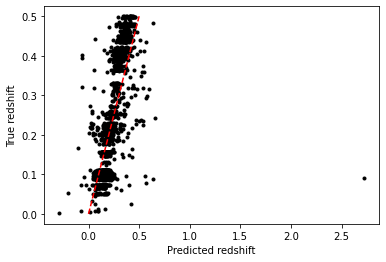

In [220]:

plt.plot(ypred,ytest_all,'.k')
plt.plot([0,.5],[0,.5],'--r')
plt.xlabel('Predicted redshift')
plt.ylabel('True redshift')
print(model.score(Xtest_all,ytest_all)) ### R^2 score for our model

Next, lets look at dimensionality reduction to see if that helps with our redshift determination. 

[7.24975057e-01 2.51994175e-01 1.94328113e-02 2.67450583e-03
 6.52512612e-04]


Text(0, 0.5, 'Predicted rad')

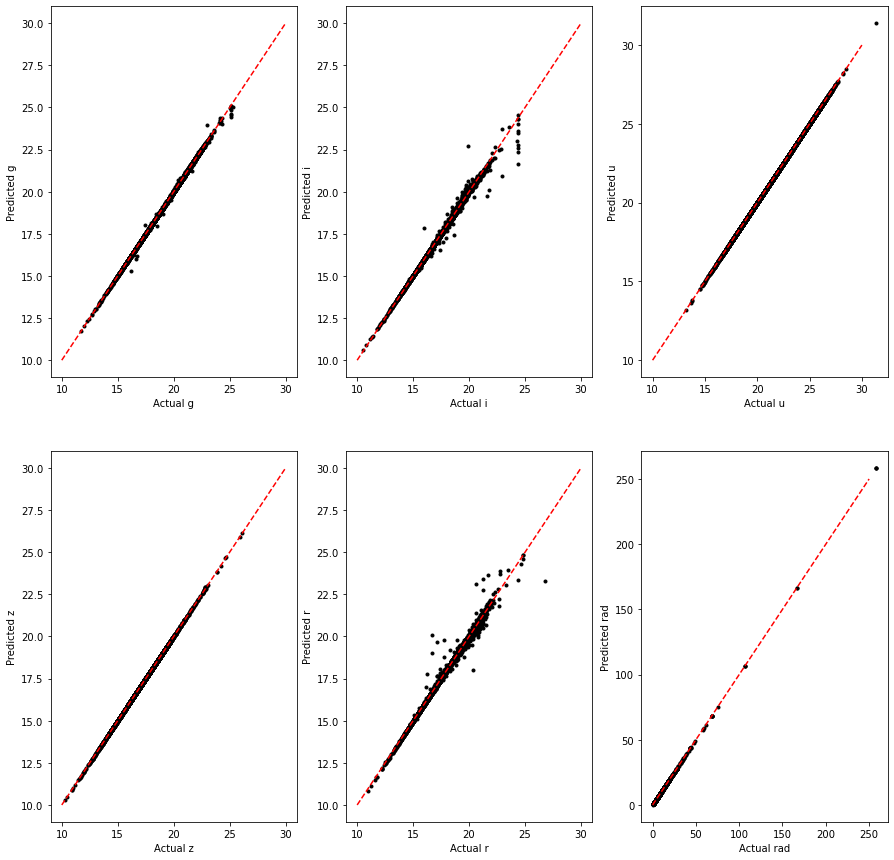

In [193]:
from sklearn import decomposition

model = decomposition.PCA(n_components=5)
model.fit(X_all)
print(model.explained_variance_ratio_)

### This transforms our training and test sets based on the PCA
Xtrain_all_scaled = model.transform(Xtrain_all)
Xtest_all_scaled = model.transform(Xtest_all)
X_all_scaled = model.transform(X_all)

X_all_rec = model.inverse_transform(X_all_scaled)

plt.figure(figsize=(15,15))
plt.subplot(2,3,1)
plt.plot(X_all['modelmag_g'],X_all_rec[:,0],'.k')
plt.plot([10,30],[10,30],'--r')
plt.xlabel('Actual g')
plt.ylabel('Predicted g')

plt.subplot(2,3,2)
plt.plot(X_all['modelmag_i'],X_all_rec[:,1],'.k')
plt.plot([10,30],[10,30],'--r')
plt.xlabel('Actual i')
plt.ylabel('Predicted i')


plt.subplot(2,3,3)
plt.plot(X_all['modelmag_u'],X_all_rec[:,2],'.k')
plt.plot([10,30],[10,30],'--r')
plt.xlabel('Actual u')
plt.ylabel('Predicted u')


plt.subplot(2,3,4)
plt.plot(X_all['modelmag_z'],X_all_rec[:,3],'.k')
plt.plot([10,30],[10,30],'--r')
plt.xlabel('Actual z')
plt.ylabel('Predicted z')


plt.subplot(2,3,5)
plt.plot(X_all['modelmag_r'],X_all_rec[:,4],'.k')
plt.plot([10,30],[10,30],'--r')
plt.xlabel('Actual r')
plt.ylabel('Predicted r')

plt.subplot(2,3,6)
plt.plot(X_all['petroRAD_r'],X_all_rec[:,5],'.k')
plt.plot([0,250],[00,250],'--r')
plt.xlabel('Actual rad')
plt.ylabel('Predicted rad')


[0.87771686 0.07093261 0.05135052]


Text(0, 0.5, 'Predicted i-z')

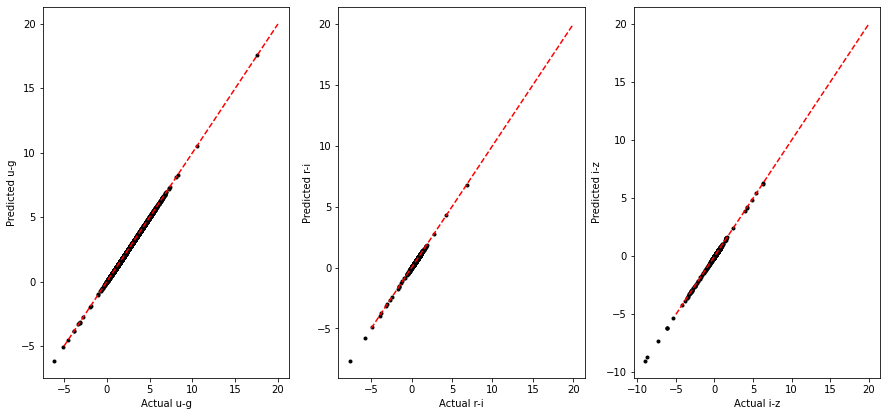

In [226]:
from sklearn import decomposition

model = decomposition.PCA(n_components=3)
model.fit(X_all)
print(model.explained_variance_ratio_)

### This transforms our training and test sets based on the PCA
Xtrain_all_scaled = model.transform(Xtrain_all)
Xtest_all_scaled = model.transform(Xtest_all)
X_all_scaled = model.transform(X_all)

X_all_rec = model.inverse_transform(X_all_scaled)

plt.figure(figsize=(15,15))
plt.subplot(2,3,1)
plt.plot(X_all['u-g'],X_all_rec[:,0],'.k')
plt.plot([-5,20],[-5,20],'--r')
plt.xlabel('Actual u-g')
plt.ylabel('Predicted u-g')

plt.subplot(2,3,2)
plt.plot(X_all['r-i'],X_all_rec[:,1],'.k')
plt.plot([-5,20],[-5,20],'--r')
plt.xlabel('Actual r-i')
plt.ylabel('Predicted r-i')

plt.subplot(2,3,3)
plt.plot(X_all['i-z'],X_all_rec[:,2],'.k')
plt.plot([-5,20],[-5,20],'--r')
plt.xlabel('Actual i-z')
plt.ylabel('Predicted i-z')

Now lets try the redshift prediction based on the PCA modified data

0.4542835322434352


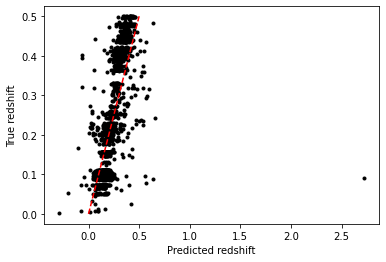

In [223]:
model = linear_model.LinearRegression()
model.fit(Xtrain_all_scaled,ytrain_all)

ypred = model.predict(Xtest_all_scaled)

plt.plot(ypred,ytest_all,'.k')
plt.plot([0,.5],[0,.5],'--r')
plt.xlabel('Predicted redshift')
plt.ylabel('True redshift')
print(model.score(Xtest_all_scaled,ytest_all)) ### R^2 score for our model

Next lets try a clustering algorithm to see if we can distinguish different types of galaxies within our dataset. 

[[1.92296928 0.51418611 0.35489159 0.18486321]
 [4.76071131 0.72943485 0.36788245 0.39075498]
 [0.84564958 0.79693603 0.43246782 0.4300343 ]
 [3.02734742 0.71213311 0.37643658 0.36826293]
 [1.24926438 0.35363305 0.20532922 0.10257211]]


Text(0, 0.5, 'i-z')

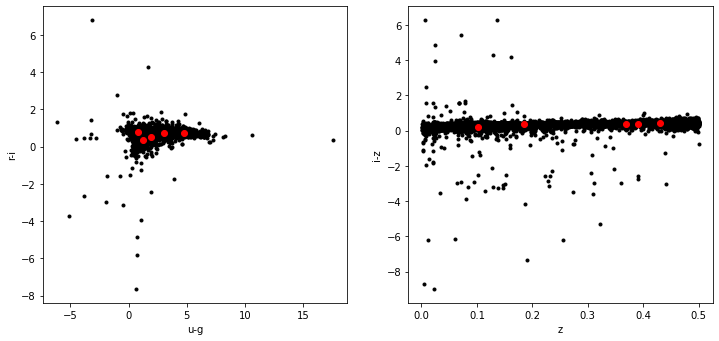

In [229]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
result = model.fit(df2)

print(result.cluster_centers_)

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.plot(X_all['u-g'],X_all['r-i'],'.k')
plt.plot(result.cluster_centers_[:,0],result.cluster_centers_[:,1],'or')
plt.xlabel('u-g')
plt.ylabel('r-i')

plt.subplot(2,2,2)
plt.plot(df2['z'],X_all['i-z'],'.k')
plt.plot(result.cluster_centers_[:,3],result.cluster_centers_[:,2],'or')
plt.xlabel('z')
plt.ylabel('i-z')


(1) Mark a subset of galaxies as cluster members (based on redshift) and then predict what galaxies are cluster members (based on ugriz colors?).
* Talk about making sure data covers the same parameter space (in ugriz).
* Talk about accuracy and a confusion matrix
(2) Predict z band magnitude based on ugri magnitudes.
* What is the method for accessing accuracy? 
(3) Apply clustering algorithm to the data to see if it can find the galaxy cluster.
* How to evaluate accuracy? Visual inspection of the groups?
(4) Apply dimensionality reduction to ugriz magnitudes to see if there are any patterns. 